In [1]:
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import nibabel as nib

%matplotlib inline

In [2]:
X = np.load('../../../marguiles/timeseries/timeseries.sub-010122.npy')
print(X.shape)

(18715, 2608)


In [3]:
pca = PCA(10)
pca.fit(X.T)

print(pca.components_.shape)

(10, 18715)


In [4]:
# plot on fsa5 surface:
from nilearn import datasets, plotting
fsa5 = datasets.fetch_surf_fsaverage()

/home/j1c/graphstats/venv/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


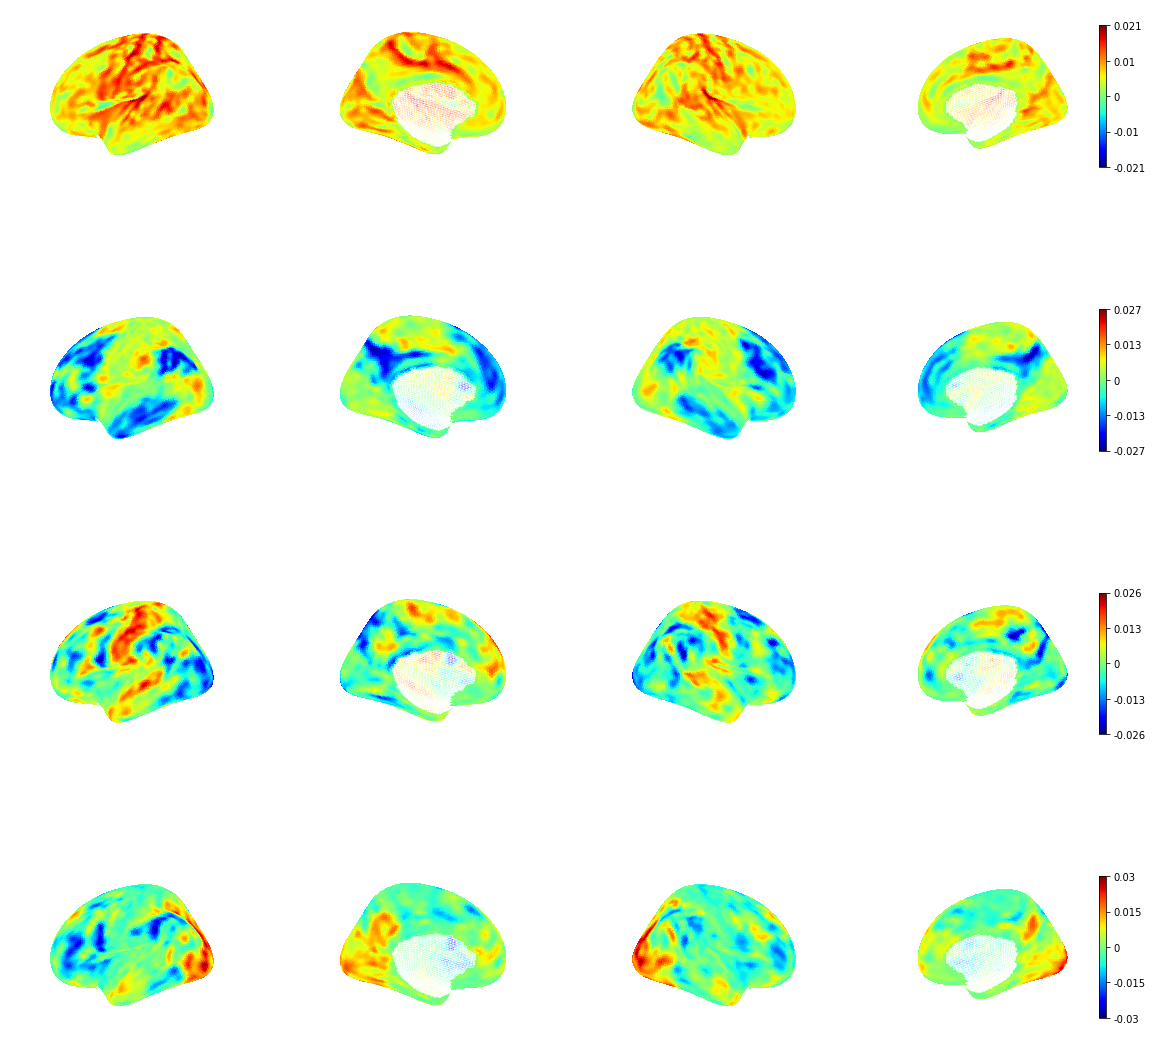

In [5]:
fig, axes = plt.subplots(4, 4, subplot_kw={'projection': '3d'}, figsize=(20, 20))
for i in range(4):
    ax = axes[i]
    X = pca.components_.T[:, i]
    
    cortex_left = nib.freesurfer.read_label('../../data/lh.cortex.label')

    conn_map = np.zeros(10242)
    conn_map[cortex_left] = X[:len(cortex_left)]

    plotting.plot_surf_stat_map(fsa5.infl_left, 
      conn_map, hemi='left', colorbar=False, cmap='jet', axes = ax[0])

    plotting.plot_surf_stat_map(fsa5.infl_left,
      conn_map, hemi='left', colorbar=False, cmap='jet', view='medial', axes=ax[1])

    cortex_right = nib.freesurfer.read_label('../../data/rh.cortex.label')

    conn_map2 = np.zeros(10242)
    conn_map2[cortex_right] = X[len(cortex_left):]

    plotting.plot_surf_stat_map(fsa5.infl_right, 
      conn_map2, hemi='right', colorbar=False, cmap='jet', axes = ax[2])

    plotting.plot_surf_stat_map(fsa5.infl_right,
      conn_map2, hemi='right', colorbar=True, cmap='jet', view='medial', axes=ax[3])